<a href="https://colab.research.google.com/github/worawit-saetan/The-Reuters-Dataset---Classifying-Newswires/blob/main/The_Reuters_Dataset_Classifying_Newswires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Reuters Dataset : Classifying newswires (a multiclass classification)
We ’ll build a network to classify Reuters newswires into 46 mutually
exclusive topics.

*   load the Reuers dataset
*   encoding  X_train and X_test
*   create deep neural network model
*   train and validate the model
*   plot the accuracy and loss of the model







In [ ]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [ ]:
len(train_data)

8982

In [ ]:
len(test_data)

2246

In [ ]:
print(train_data[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [ ]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
train_data[0]])
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [ ]:
reverse_word_index[2]

'of'

In [ ]:
train_labels[0]

3

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25])

In [ ]:
from keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [ ]:
one_hot_train_labels[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
from keras import models
from keras import layers
model = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [ ]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [ ]:
partial_x_train.shape

(7982, 10000)

In [ ]:
x_val.shape

(1000, 10000)

In [ ]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 69ms/step - loss: 2.7506 - accuracy: 0.5252 - val_loss: 1.8197 - val_accuracy: 0.6480
Epoch 2/20
16/16 [==============================] - 1s 51ms/step - loss: 1.4634 - accuracy: 0.7151 - val_loss: 1.3177 - val_accuracy: 0.7140
Epoch 3/20
16/16 [==============================] - 1s 51ms/step - loss: 1.0533 - accuracy: 0.7869 - val_loss: 1.1396 - val_accuracy: 0.7580
Epoch 4/20
16/16 [==============================] - 1s 51ms/step - loss: 0.8243 - accuracy: 0.8311 - val_loss: 1.0363 - val_accuracy: 0.7810
Epoch 5/20
16/16 [==============================] - 1s 51ms/step - loss: 0.6566 - accuracy: 0.8680 - val_loss: 1.0006 - val_accuracy: 0.7900
Epoch 6/20
16/16 [==============================] - 1s 52ms/step - loss: 0.5229 - accuracy: 0.8961 - val_loss: 0.9904 - val_accuracy: 0.7830
Epoch 7/20
16/16 [==============================] - 1s 50ms/step - loss: 0.4218 - accuracy: 0.9137 - val_loss: 0.9127 - val_accuracy: 0.8090
Epoch 8/20
16

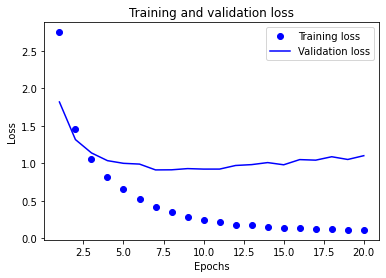

In [ ]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

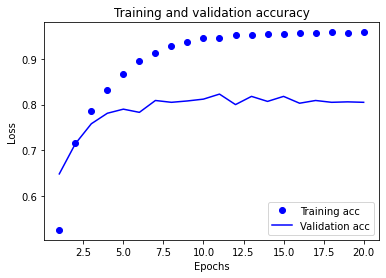

In [ ]:
#plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

The network begins to overfit after nine epochs. Let’s train a new network from
scratch for nine epochs and then evaluate it on the test set.

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/9
16/16 [==============================] - 2s 63ms/step - loss: 2.5170 - accuracy: 0.5123 - val_loss: 1.7142 - val_accuracy: 0.6510
Epoch 2/9
16/16 [==============================] - 1s 51ms/step - loss: 1.4088 - accuracy: 0.7103 - val_loss: 1.2896 - val_accuracy: 0.7140
Epoch 3/9
16/16 [==============================] - 1s 51ms/step - loss: 1.0492 - accuracy: 0.7755 - val_loss: 1.1165 - val_accuracy: 0.7500
Epoch 4/9
16/16 [==============================] - 1s 50ms/step - loss: 0.8265 - accuracy: 0.8218 - val_loss: 1.0098 - val_accuracy: 0.7860
Epoch 5/9
16/16 [==============================] - 1s 51ms/step - loss: 0.6558 - accuracy: 0.8607 - val_loss: 0.9402 - val_accuracy: 0.8040
Epoch 6/9
16/16 [==============================] - 1s 51ms/step - loss: 0.5251 - accuracy: 0.8890 - val_loss: 0.9094 - val_accuracy: 0.8110
Epoch 7/9
16/16 [==============================] - 1s 51ms/step - loss: 0.4248 - accuracy: 0.9087 - val_loss: 0.8849 - val_accuracy: 0.8100
Epoch 8/9
16/16 [===

In [ ]:
results = model.evaluate(x_test, one_hot_test_labels)
results

71/71 [==============================] - 1s 7ms/step - loss: 0.9630 - accuracy: 0.7827


[0.9630013704299927, 0.7827248573303223]

In [ ]:
predictions = model.predict(x_test)
predictions

71/71 [==============================] - 1s 6ms/step


array([[8.3204883e-05, 3.4701596e-05, 2.3390543e-05, ..., 2.2158615e-06,
        1.9869865e-06, 4.2970038e-07],
       [1.6402043e-04, 1.3190194e-03, 4.0180697e-03, ..., 2.6286409e-06,
        1.8784232e-05, 1.6661812e-06],
       [1.5666921e-03, 7.4561232e-01, 4.9086087e-03, ..., 7.0870965e-04,
        9.5614092e-04, 3.5976936e-04],
       ...,
       [2.7514086e-05, 9.9537967e-05, 6.6507050e-06, ..., 5.8088476e-06,
        1.8689301e-06, 2.6336493e-06],
       [1.4130517e-03, 6.6886753e-02, 4.5752977e-03, ..., 5.4388191e-04,
        1.7559092e-04, 3.3068409e-05],
       [1.6376926e-03, 6.0804796e-01, 2.2823805e-02, ..., 4.0237221e-04,
        1.3064758e-03, 3.0220728e-04]], dtype=float32)

In [ ]:
predictions[0]

array([8.3204883e-05, 3.4701596e-05, 2.3390543e-05, 9.5319670e-01,
       4.2396426e-02, 3.7898749e-06, 2.5752292e-06, 6.4819746e-05,
       3.2035218e-04, 6.8721774e-06, 5.2569153e-06, 1.3231451e-04,
       1.1208497e-05, 1.9601497e-04, 2.2861855e-04, 8.0500977e-06,
       4.6265114e-04, 3.0214811e-05, 2.1868414e-05, 3.1432864e-04,
       4.5909782e-04, 2.9873211e-04, 7.9360361e-05, 4.5687706e-05,
       7.6431410e-05, 1.1198982e-04, 8.8883701e-07, 2.1810993e-05,
       4.4421580e-05, 2.2404555e-04, 2.5288746e-05, 2.2252071e-04,
       3.3164197e-05, 1.0295893e-06, 2.0026539e-05, 3.0022263e-06,
       3.3040499e-04, 9.0969006e-06, 1.2785645e-05, 3.7358308e-04,
       9.8789633e-06, 4.4451797e-05, 4.3378923e-06, 2.2158615e-06,
       1.9869865e-06, 4.2970038e-07], dtype=float32)

In [ ]:
predictions[0].shape

(46,)

In [ ]:
np.argmax(predictions[0])

3

because the final outputs are 46-dimensional, we should
avoid intermediate layers with many fewer than 46 hidden units. Now let’s see what happens when we introduce an information bottleneck by having intermediate layers that are significantly less than 46-dimensional for example, 4-dimensional.

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 3s 38ms/step - loss: 2.7546 - accuracy: 0.3398 - val_loss: 2.0329 - val_accuracy: 0.3740
Epoch 2/20
63/63 [==============================] - 1s 20ms/step - loss: 1.7629 - accuracy: 0.5223 - val_loss: 1.5900 - val_accuracy: 0.6060
Epoch 3/20
63/63 [==============================] - 1s 20ms/step - loss: 1.4278 - accuracy: 0.6263 - val_loss: 1.4359 - val_accuracy: 0.6260
Epoch 4/20
63/63 [==============================] - 1s 19ms/step - loss: 1.2621 - accuracy: 0.6661 - val_loss: 1.3737 - val_accuracy: 0.6540
Epoch 5/20
63/63 [==============================] - 1s 19ms/step - loss: 1.1513 - accuracy: 0.6972 - val_loss: 1.3456 - val_accuracy: 0.6660
Epoch 6/20
63/63 [==============================] - 1s 19ms/step - loss: 1.0676 - accuracy: 0.7091 - val_loss: 1.3379 - val_accuracy: 0.6680
Epoch 7/20
63/63 [==============================] - 1s 19ms/step - loss: 1.0035 - accuracy: 0.7139 - val_loss: 1.3501 - val_accuracy: 0.6610
Epoch 8/20
63

In [ ]:
results = model.evaluate(x_test, one_hot_test_labels)
results

71/71 [==============================] - 0s 6ms/step - loss: 2.2173 - accuracy: 0.6576


[2.217287540435791, 0.6576135158538818]

The network now peaks at 65% validation accuracy, an 13% absolute drop. 

This drop is mostly due to the fact that we are trying to compress a lot of information (enough information to recover the separation hyperplanes of 46 classes) into an intermediate space that is too low-dimensional.